In [ ]:
!pip install transformers
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Google Drive file ID
file_id = "1FSzieWEEDZEm1oReWLm5YAF0DPcSa2OX"
url = f"https://drive.google.com/uc?id={file_id}"

# Load the dataset
df = pd.read_csv(url)

In [ ]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
# Check for missing values in each column
print(df.isnull().sum())


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [ ]:
# Fill negativereason with 'No Reason'
df['negativereason'] = df['negativereason'].fillna('No Reason')

# Fill negativereason_confidence with 0
df['negativereason_confidence'] = df['negativereason_confidence'].fillna(0)


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources (do this once)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    # Remove mentions and links
    tweet = re.sub(r'@[\w]*', '', tweet)
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove stopwords and lemmatize
    tweet = ' '.join(lemmatizer.lemmatize(word) for word in tweet.split() if word not in stop_words)
    return tweet

# Apply the cleaning function
df['cleaned_text'] = df['text'].apply(clean_tweet)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(df[['text', 'cleaned_text']].head())


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                               said  
1       plus youve added commercial experience tacky  
2       didnt today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['airline_sentiment'])


In [ ]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1889
           1       0.77      0.15      0.26       580
           2       0.90      0.22      0.36       459

    accuracy                           0.71      2928
   macro avg       0.79      0.46      0.48      2928
weighted avg       0.74      0.71      0.63      2928



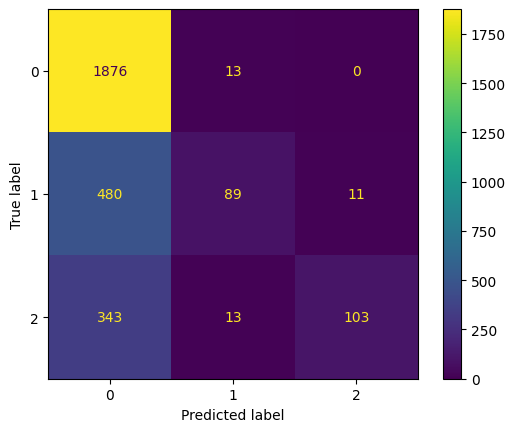

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test)


              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1889
           1       0.69      0.48      0.57       580
           2       0.80      0.67      0.73       459

    accuracy                           0.80      2928
   macro avg       0.77      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



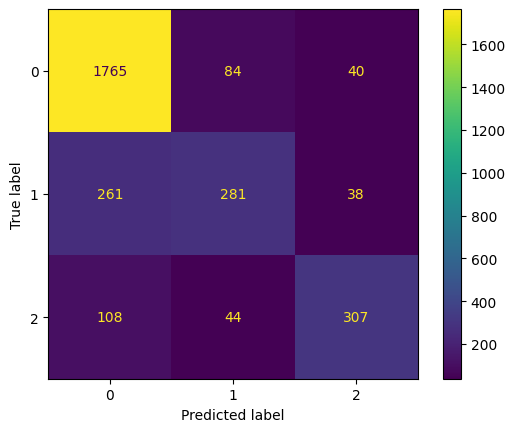

In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_vec)

# Evaluation
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_vec, y_test)


              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1889
           1       0.77      0.15      0.26       580
           2       0.90      0.22      0.36       459

    accuracy                           0.71      2928
   macro avg       0.79      0.46      0.48      2928
weighted avg       0.74      0.71      0.63      2928



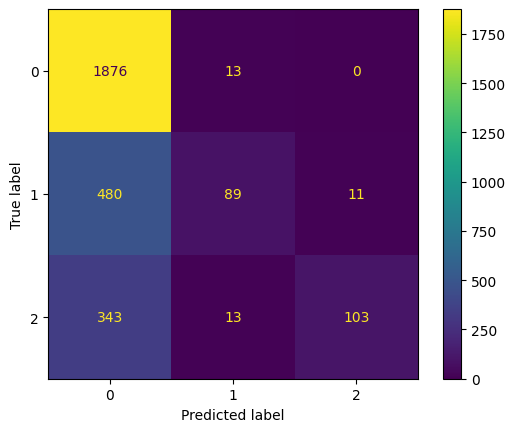

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Initialize the model
nb_model = MultinomialNB()

# Fit the model on the training data
nb_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_vec)

# Print the classification report
print(classification_report(y_test, y_pred_nb))

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(nb_model, X_test_vec, y_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Building the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test), verbose=2)

# Evaluating the model
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f'Accuracy: {accuracy}')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


183/183 - 38s - 209ms/step - accuracy: 0.7086 - loss: 0.7144 - val_accuracy: 0.7893 - val_loss: 0.5394
Epoch 2/5
183/183 - 40s - 218ms/step - accuracy: 0.8209 - loss: 0.4523 - val_accuracy: 0.8046 - val_loss: 0.5100
Epoch 3/5
183/183 - 42s - 228ms/step - accuracy: 0.8682 - loss: 0.3480 - val_accuracy: 0.7964 - val_loss: 0.5309
Epoch 4/5
Epoch 5/5
183/183 - 38s - 209ms/step - accuracy: 0.9098 - loss: 0.2455 - val_accuracy: 0.7883 - val_loss: 0.6267
Accuracy: 0.7882513403892517


In [ ]:
from sklearn.metrics import classification_report

# Predictions for LSTM model
y_pred_lstm = model.predict(X_test_pad)
y_pred_lstm_classes = tf.argmax(y_pred_lstm, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_lstm_classes))


92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1889
           1       0.60      0.58      0.59       580
           2       0.73      0.72      0.72       459

    accuracy                           0.79      2928
   macro avg       0.73      0.72      0.73      2928
weighted avg       0.79      0.79      0.79      2928



In [ ]:
from sklearn.metrics import classification_report

# Predictions for LSTM model
y_pred_lstm = model.predict(X_test_pad)
y_pred_lstm_classes = tf.argmax(y_pred_lstm, axis=1).numpy()  # Convert to NumPy array for compatibility

# Print classification report
print(classification_report(y_test, y_pred_lstm_classes))


92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1889
           1       0.60      0.58      0.59       580
           2       0.73      0.72      0.72       459

    accuracy                           0.79      2928
   macro avg       0.73      0.72      0.73      2928
weighted avg       0.79      0.79      0.79      2928



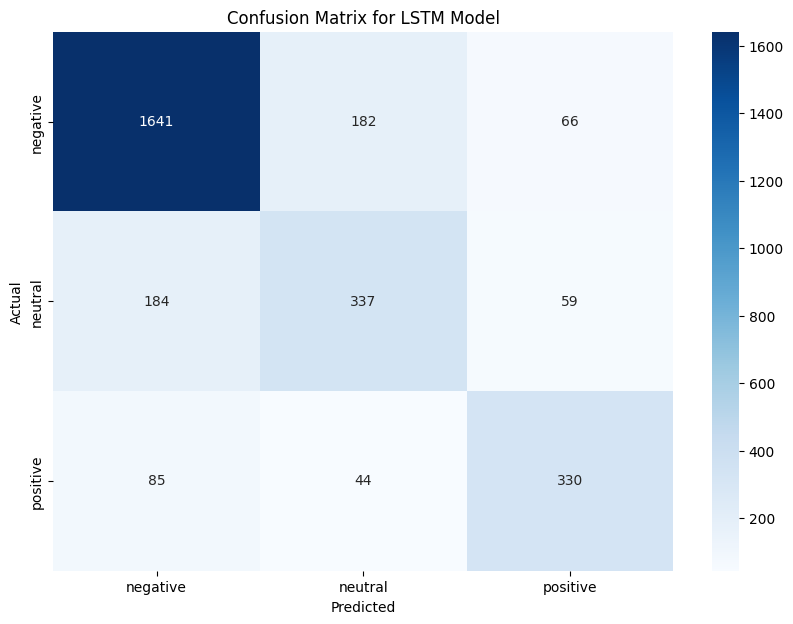

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for LSTM
conf_matrix = confusion_matrix(y_test, y_pred_lstm_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for LSTM Model')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Naive Bayes
y_pred_nb = nb_model.predict(X_test_vec)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

# SVM
y_pred_svm = svm_model.predict(X_test_vec)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# LSTM
y_pred_lstm = model.predict(X_test_pad)
y_pred_lstm_classes = tf.argmax(y_pred_lstm, axis=1).numpy()
report_lstm = classification_report(y_test, y_pred_lstm_classes, output_dict=True)

# Extract metrics
metrics = {
    "Model": ["Naive Bayes", "SVM", "LSTM"],
    "Accuracy": [
        report_nb['accuracy'],
        report_svm['accuracy'],
        report_lstm['accuracy']
    ],
    "Precision": [
        report_nb['weighted avg']['precision'],
        report_svm['weighted avg']['precision'],
        report_lstm['weighted avg']['precision']
    ],
    "Recall": [
        report_nb['weighted avg']['recall'],
        report_svm['weighted avg']['recall'],
        report_lstm['weighted avg']['recall']
    ],
    "F1-score": [
        report_nb['weighted avg']['f1-score'],
        report_svm['weighted avg']['f1-score'],
        report_lstm['weighted avg']['f1-score']
    ]
}

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step
         Model  Accuracy  Precision    Recall  F1-score
0  Naive Bayes  0.706284   0.743365  0.706284  0.634686
1          SVM  0.803620   0.794691  0.803620  0.792696
2         LSTM  0.788251   0.786556  0.788251  0.787358


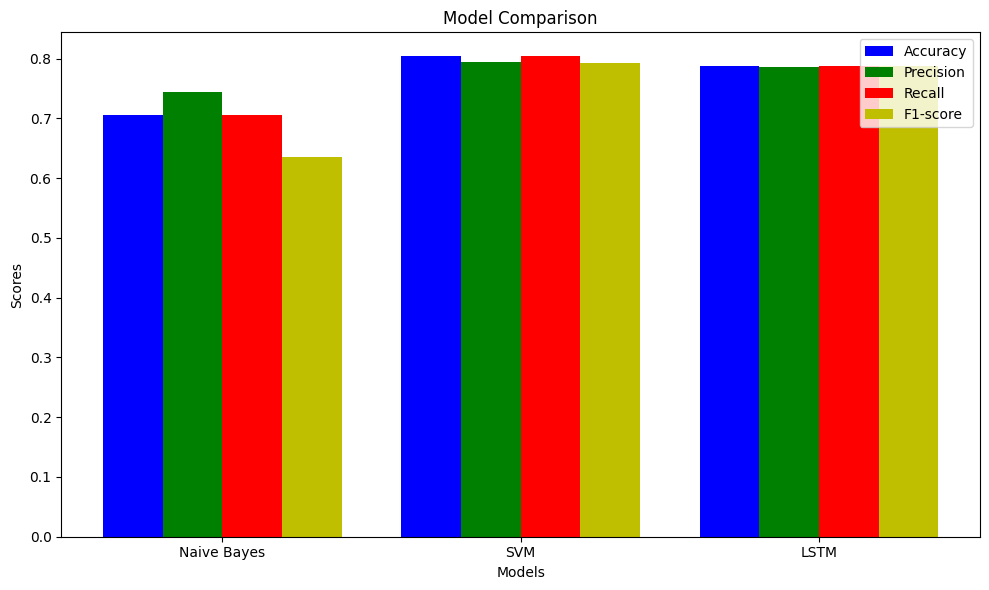

In [ ]:
import matplotlib.pyplot as plt

# Set the bar width
bar_width = 0.2
index = range(len(metrics_df))

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
ax.bar(index, metrics_df['Accuracy'], bar_width, label='Accuracy', color='b')
ax.bar([i + bar_width for i in index], metrics_df['Precision'], bar_width, label='Precision', color='g')
ax.bar([i + bar_width * 2 for i in index], metrics_df['Recall'], bar_width, label='Recall', color='r')
ax.bar([i + bar_width * 3 for i in index], metrics_df['F1-score'], bar_width, label='F1-score', color='y')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks([i + bar_width * 1.5 for i in index])
ax.set_xticklabels(metrics_df['Model'])
ax.legend()

plt.tight_layout()
plt.show()
